In [1]:
import pandas as pd
import numpy as np
import torch
import warnings
from src.plot_utils import *
from src.space_model import space_model
from src.nn_model import nnModel
from src.plot_utils import *
from matplotlib import animation
from moviepy.editor import *
warnings.simplefilter(action="ignore", category=DeprecationWarning)

In [2]:
df = pd.read_json('./Data/sample_match_1_with_v.json')
e_df = pd.read_json('./Data/sample_Game_1_events.json')

In [3]:
p_model = pc_model()

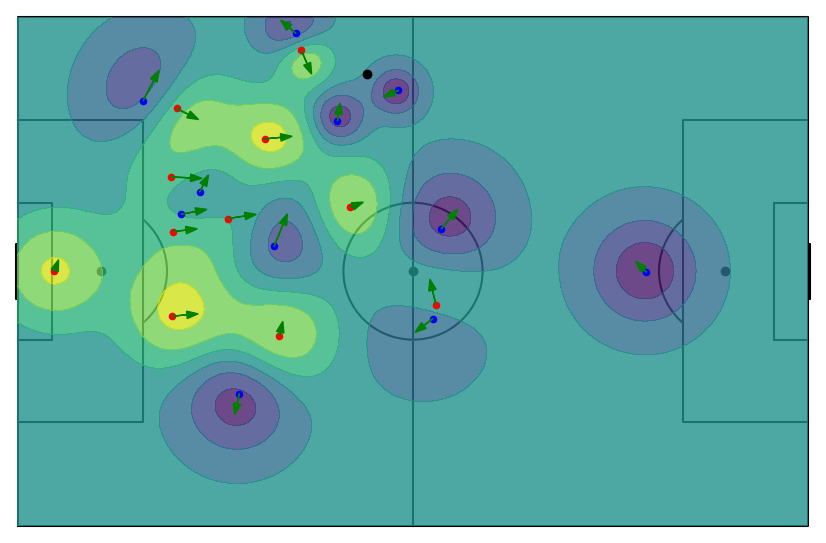

In [4]:
_, _, _ = p_model.plot_frame(1000)

In [5]:
sp_model = space_model(df, e_df)

In [6]:
sp_model.df.head()

,Period,Frame,Time [s],H11_x,H11_y,H1_x,H1_y,H2_x,H2_y,H3_x,...,A12_x_v,A12_y_v,A12_v_abs,A13_x_v,A13_y_v,A13_v_abs,A14_x_v,A14_y_v,A14_v_abs,owning
2,1,1,0.04,0.08528,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1,2,0.08,0.09984,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,3,0.12,0.11856,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5,1,4,0.16,0.12584,32.80184,33.92688,44.41556,35.03448,33.31184,32.18176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6,1,5,0.20,0.13416,32.80184,33.90088,44.38292,35.01056,33.33224,32.18592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [7]:
sp_model.set_frame(1000)

In [8]:
sp_model.set_frame_flag

True

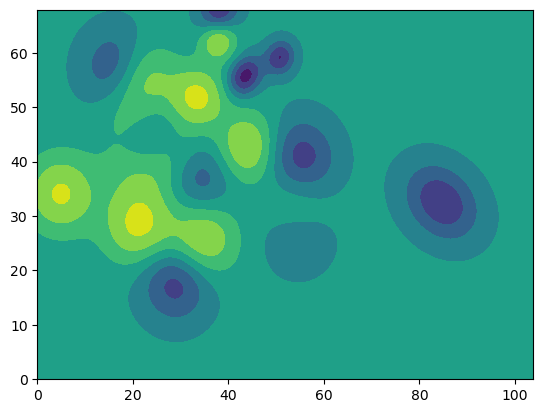

In [9]:
x, y = np.mgrid[0:104:0.1, 0:68:0.1]
locations = np.concatenate([x.reshape(-1,1), y.reshape(-1,1)], axis=1)
z = sp_model.pitch_control(locations)
plt.contourf(x.reshape(1040, 680), y.reshape(1040, 680), z.reshape(1040, 680))

In [10]:
nn_model = nnModel()
nn_model.load_state_dict(torch.load('./SpaceValueModel/best_svmodel_sdict.pt'))

<All keys matched successfully>

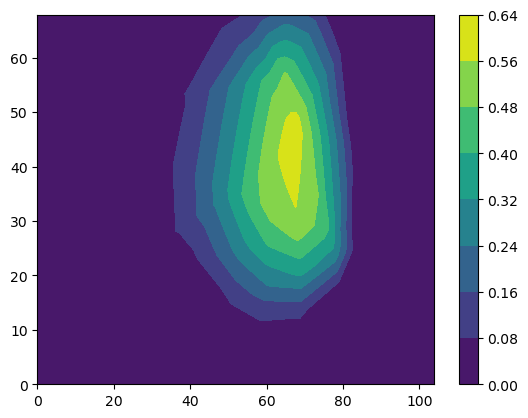

In [11]:
x, y = np.mgrid[0:104:0.1, 0:68:0.1]
locations = np.concatenate([x.reshape(-1,1), y.reshape(-1,1)], axis=1)
z = sp_model.space_value(locations)
plt.contourf(x.reshape(1040, 680), y.reshape(1040, 680), z.reshape(1040, 680))
plt.colorbar()

In [12]:
nn_model = nnModel()
nn_model.load_state_dict(torch.load('./SpaceValueModel/best_svmodel_sdict.pt'))

x = locations.reshape(-1, 2)[:,0].reshape(-1, 1) /104
y = locations.reshape(-1, 2)[:,1].reshape(-1, 1) /68

In [13]:

ball_x = sp_model.ball_x * np.ones_like(x) / 104
ball_y = sp_model.ball_y * np.ones_like(y) / 68

input = torch.FloatTensor(np.concatenate([ball_x, ball_y, x, y], axis=1))
output = nn_model(input)
output = output.detach().numpy()

z = sp_model.distance_from_goal(x*104, y*68)
output = output.reshape(-1) * z.reshape(-1) 


In [14]:
s2 = sp_model.space_quality(1)


In [15]:
print(np.max(df[df['Period'] == 1]['Frame']), 'period 1 frame')

71268 period 1 frame


In [16]:
print(np.max(df[df['Period'] == 2]['Frame']), 'period 2 frame')

145006 period 2 frame


In [17]:
sq = pd.DataFrame(columns = list(set([i.split('_')[0] +'_sq' for i in df.columns if i.startswith('H') or i.startswith('A')]))+['frame'])

In [18]:
for i in np.arange(0, len(df), 25):
    sp_model.set_frame(i+1)
    if sp_model.set_frame_flag :
        if df.loc[df['Frame'] == i+1, 'Period'].values[0] == 1:
            t_sq = sp_model.space_quality(1)
            t_sq['frame'] = i+1
        else :
            t_sq = sp_model.space_quality(-1)
            t_sq['frame'] = i+1
    else :
        t_sq = {'frame':i+1}
        
    sq.loc[i] = t_sq
    print('\r   {}   '.format(i), end="")

   145000   

In [19]:
sq_back = sq
#sq = sq_back

In [20]:
sq

,H4_sq,H11_sq,H8_sq,A1_sq,A7_sq,A11_sq,A14_sq,A12_sq,H5_sq,H7_sq,...,A2_sq,A4_sq,A3_sq,H14_sq,A13_sq,H13_sq,H3_sq,A5_sq,H1_sq,frame
0,0.0,0.0,0.035229,0.013344,0.053697,0.0,NaN,NaN,0.039280,0.020463,...,0.000591,0.228383,0.006896,NaN,NaN,NaN,0.002963,0.164225,0.017029,1
25,0.0,0.0,0.010268,0.011772,0.072353,0.0,NaN,NaN,0.040494,0.019707,...,0.000156,0.221466,0.009420,NaN,NaN,NaN,0.001189,0.150040,0.022302,26
50,0.0,0.0,0.002593,0.022455,0.134825,0.0,NaN,NaN,0.059969,0.023770,...,0.009361,0.237792,0.036013,NaN,NaN,NaN,0.002258,0.152037,0.016010,51
75,0.0,0.0,0.005521,0.046388,0.174965,0.0,NaN,NaN,0.096144,0.057444,...,0.025764,0.235351,0.077151,NaN,NaN,NaN,0.003420,0.153456,0.009595,76
100,0.0,0.0,0.001469,0.045798,0.109134,0.0,NaN,NaN,0.028193,0.044569,...,0.027542,0.251142,0.045582,NaN,NaN,NaN,0.007389,0.128734,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144901
144925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144926
144950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144951
144975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144976


In [22]:
sq.loc[:, ~sq.columns.isin(['frame'])] = sq.loc[:, ~sq.columns.isin(['frame'])] - sq.loc[:, ~sq.columns.isin(['frame'])].shift(1)

In [23]:
f_df = pd.merge(left = df, right = sq, right_on='frame', left_on='Frame', how='right')

In [24]:
f_df.head()

,Period,Frame,Time [s],H11_x,H11_y,H1_x,H1_y,H2_x,H2_y,H3_x,...,A2_sq,A4_sq,A3_sq,H14_sq,A13_sq,H13_sq,H3_sq,A5_sq,H1_sq,frame
0,1,1,0.04,0.08528,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,26,1.04,0.06656,32.72976,33.68144,42.30824,34.59560,32.38772,32.77352,...,-0.000435,-0.006917,0.002523,NaN,NaN,NaN,-0.001775,-0.014185,0.005273,26
2,1,51,2.04,-0.02080,32.65768,33.14584,39.65284,34.02568,31.30992,32.86712,...,0.009205,0.016325,0.026593,NaN,NaN,NaN,0.001070,0.001996,-0.006292,51
3,1,76,3.04,0.10088,32.68896,33.17912,38.00588,34.04856,31.44524,32.99192,...,0.016404,-0.002440,0.041138,NaN,NaN,NaN,0.001161,0.001419,-0.006415,76
4,1,101,4.04,0.73632,32.80116,33.81040,39.06464,34.33976,33.44376,33.41936,...,0.001777,0.015791,-0.031569,NaN,NaN,NaN,0.003969,-0.024722,-0.009595,101


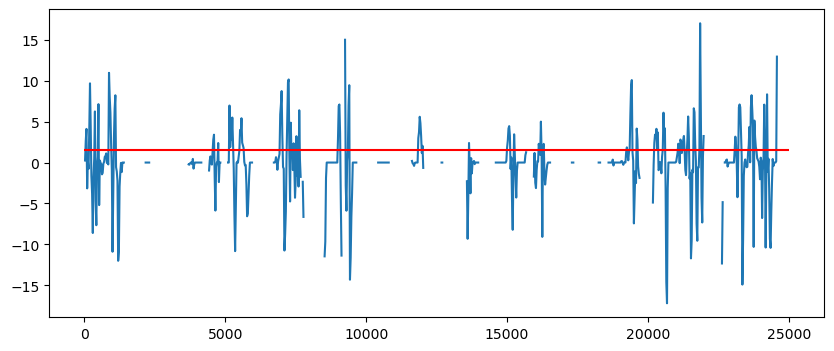

In [25]:
plt.figure(figsize = (10, 4))
plt.plot(f_df['Frame'][:1000], f_df['A3_sq'][:1000]*100)
#plt.plot(f_df['Frame'][:1000], f_df['H2_v_abs'][:1000])
#plt.plot(f_df['Frame'][:1000], f_df['Ball_x'][:1000]/10)
plt.hlines(y=1.5, xmin=0, xmax=25000, color='red')

In [26]:
f_df.to_json('./Data/sample_match_1_w_sog.json')

In [27]:
f_df.loc[:, [i for i in f_df.columns if 'sq' in i]]

,H4_sq,H11_sq,H8_sq,A1_sq,A7_sq,A11_sq,A14_sq,A12_sq,H5_sq,H7_sq,...,H2_sq,A2_sq,A4_sq,A3_sq,H14_sq,A13_sq,H13_sq,H3_sq,A5_sq,H1_sq
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,-0.024960,-0.001572,0.018655,0.0,NaN,NaN,0.001214,-0.000756,...,-0.001872,-0.000435,-0.006917,0.002523,NaN,NaN,NaN,-0.001775,-0.014185,0.005273
2,0.0,0.0,-0.007675,0.010683,0.062473,0.0,NaN,NaN,0.019475,0.004063,...,0.000238,0.009205,0.016325,0.026593,NaN,NaN,NaN,0.001070,0.001996,-0.006292
3,0.0,0.0,0.002927,0.023933,0.040139,0.0,NaN,NaN,0.036175,0.033674,...,0.000232,0.016404,-0.002440,0.041138,NaN,NaN,NaN,0.001161,0.001419,-0.006415
4,0.0,0.0,-0.004052,-0.000590,-0.065831,0.0,NaN,NaN,-0.067951,-0.012875,...,0.004236,0.001777,0.015791,-0.031569,NaN,NaN,NaN,0.003969,-0.024722,-0.009595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
sq_value = f_df.loc[:, [i for i in f_df.columns if 'sq' in i]].values

In [29]:
np.where(sq_value > 0.1, 1, 0)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
sum(np.where(sq_value > 0.1, 1, 0))

array([ 22,   0,  55,   8,  55,   0,   8,  24,  48,  17,  83,  28,  39,
        25,  51,  24,  85, 104,   8,  10,  42,  21,  12,   4,  23,  16,
        47,   3])

In [31]:
SOG_passive = {}
SOG_active = {}
for j in [i.split('_')[0] for i in f_df.columns if '_sq' in i]:
    p_value = 0
    a_value = 0
    for k in range(len(f_df)):
        if f_df.loc[k, j+'_sq'] >= 0.1: 
            if f_df.loc[k, j+'_v_abs'] >= 5.4:
                p_value += 1
            else :
                a_value += 1

    SOG_passive[j] = p_value
    SOG_active[j] = a_value    


In [32]:
pd.concat([pd.Series(SOG_active), pd.Series(SOG_passive)], axis=1)

,0,1
H4,18,4
H11,0,0
H8,46,9
A1,8,0
A7,50,5
A11,0,0
A14,7,1
A12,23,1
H5,42,6
H7,16,1


#### Space Occupation Gain Visualization 

In [33]:
pcmodel = pc_model() 

done


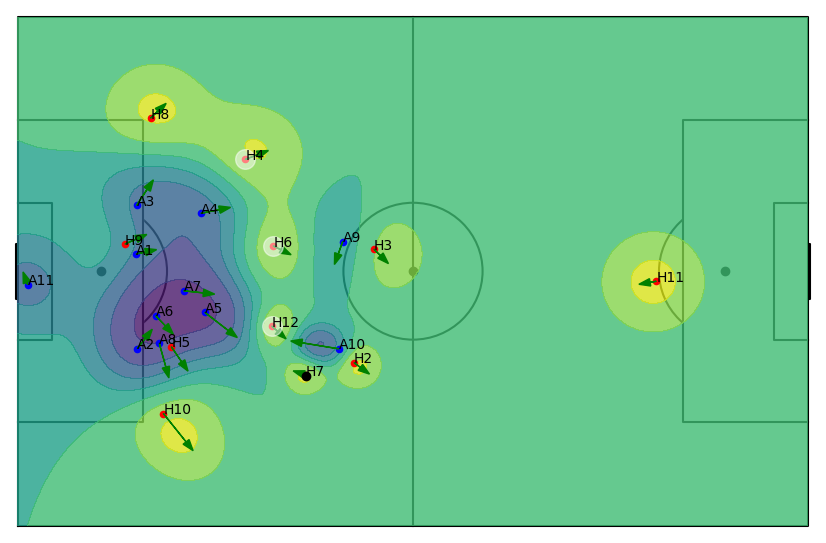

In [43]:
frame = 80500
sp_model.set_frame(frame)
if sp_model.set_frame_flag:
    print('done')
_, ax, obj = pcmodel.plot_frame(frame)
for i, j in zip(sp_model.players, sp_model.points):
    ax.text(j[0], j[1], i)
    sog_frame = frame//25*25 + 1
    sog = f_df[f_df['Frame']==sog_frame][i+'_sq'].values[0]
    if math.isnan(sog):
        continue
    if sog > 0.1:
        ax.scatter(j[0], j[1], c='white', alpha=0.5, s=200)

In [44]:
def save_plot_sog(
    start_frame, end_frame, fname='test', fps=25, figax=None
):
    writer = animation.FFMpegWriter(fps=fps)

    if figax is None:
        fig, ax = draw_pitch(pitch='white', line='black')
    else:
        fig, ax = figax

    fig.set_tight_layout(True)

    with writer.saving(fig, fname, dpi=50):
        for frame in np.arange(start_frame, end_frame, 2):
            sp_model.set_frame(frame)
            
            if sp_model.set_frame_flag: 
                fig, ax, figobj = pcmodel.plot_frame(frame, figx=(fig, ax))
                for i, j in zip(sp_model.players, sp_model.points):
                    figobj.append(ax.text(j[0], j[1], i))
                    sog_frame = frame//25*25 + 1
                    sog = f_df[f_df['Frame']==sog_frame][i+'_sq'].values[0]
                    if math.isnan(sog):
                        continue
                    if sog > 0.1:
                        figobj.append(ax.scatter(j[0], j[1], c='white', alpha=0.5, s=200))

            else :
                fig, ax, figobj = pcmodel.plot_frame(frame, figx=(fig, ax))
                
            writer.grab_frame()
            for obj in figobj:
                if type(obj) == list:
                    obj[0].remove()
                else:
                    obj.remove()

    plt.clf()
    plt.close(fig)

In [45]:
save_plot_sog(500, 1500, fname='./PitchControl/Game1_500_1500_w_sog_2.mp4')

In [46]:
save_plot_sog(80250, 81200, fname='./PitchControl/Game1_80250_90200_w_sog_2.mp4')